<a href="https://colab.research.google.com/github/aditeyabaral/neural-blackout/blob/main/notebook/Turing%20Test%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and loading Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/responses120.csv")
print(df.shape)
df.head()

(120, 19)


,Timestamp,Email Address,Would you liked to be emailed with the results of this test?,This was generated by?,This was generated by?.1,This was generated by?.2,This was generated by?.3,This was generated by?.4,This was generated by?.5,This was generated by?.6,This was generated by?.7,This was generated by?.8,This was generated by?.9,This was generated by?.10,This was generated by?.11,This was generated by?.12,This was generated by?.13,This was generated by?.14,This was generated by?.15
0,4/23/2021 9:28:38,rajatha2002@gmail.com,Yes,Machine,Machine,Human,Human,Machine,Human,Human,Machine,Human,Human,Machine,Unsure,Human,Human,Machine,Machine
1,4/23/2021 9:28:47,d.saahithi@gmail.com,Yes,Machine,Machine,Machine,Machine,Human,Human,Human,Machine,Human,Machine,Human,Human,Human,Human,Human,Human
2,4/23/2021 9:30:46,natsuanime24@gmail.com,Yes,Machine,Machine,Human,Unsure,Human,Unsure,Machine,Human,Machine,Human,Unsure,Human,Unsure,Human,Unsure,Machine
3,4/23/2021 9:32:10,saimihir.j@gmail.com,No,Machine,Human,Machine,Machine,Human,Machine,Machine,Human,Human,Machine,Machine,Machine,Machine,Human,Machine,Human
4,4/23/2021 9:33:16,mayurvp72@gmail.com,Yes,Human,Machine,Machine,Human,Human,Machine,Machine,Human,Machine,Machine,Machine,Human,Human,Machine,Machine,Machine


# Setting Constants

In [3]:
ACTUAL_ORDER = ['Human', 'Machine', 'Human', 'Human', 'Machine', 'Human', 'Machine', 'Human', 'Human', 'Human', 'Machine', 'Machine', 'Human', 'Machine', 'Machine', 'Machine']
TOTAL_RESPONSES = df.shape[0]
TOTAL_POEMS = 16

In [4]:
POEM_RESPONSES = dict()
for poem_index in range(TOTAL_POEMS):
    if poem_index == 0:
        POEM_RESPONSES[1] = list(df[f"This was generated by?"].values)  
    else:
        POEM_RESPONSES[poem_index+1] = list(df[f"This was generated by?.{poem_index}"].values)

# Defining Plot Functions

In [5]:
def plotPie(df, explode, name, title):
    actual = df["Actual"].values
    human = np.sum(df["Human"].values)
    machine = np.sum(df["Machine"].values)
    unsure = np.sum(df["Unsure"].values)
    
    sizes = [human, machine, unsure]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=["Human", "Machine", "Unsure"], autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.grid()
    plt.title(title)
    plt.savefig(f"{name}.png", dpi=200)
    plt.show()

In [6]:
def plotGroupedBar(df, name, title):
    
    plt.figure(figsize=(20, 5))
    actual = list(df["Actual"].values)
    actual = [f"{i+1}" for i, label in enumerate(actual)]
    human = df["Human"].values
    machine = df["Machine"].values
    unsure = df["Unsure"].values
    
    x = np.arange(len(actual))
    width = 0.2
    plt.bar(x+1, machine, width, label='Machine')
    plt.bar(x+1 - 1*width, human, width, label='Human')
    plt.bar(x+1 + 1*width, unsure, width, label='Unsure')
    
    plt.ylabel('Prediction Count')
    plt.title(title)
    plt.xticks(x+1, actual)
    plt.grid()
    plt.legend()

    plt.savefig(f'{name}.png', dpi=200, bbox_inches = 'tight')

    plt.show()

In [7]:
def plotGroupedBarMeanDF(df, name, title):
    
    plt.figure(figsize=(24, 5))
    actual = list(df["Actual"].values)
    #actual = [f"{i+1}" for i, label in enumerate(actual)]
    human = df["Human"].values
    machine = df["Machine"].values
    unsure = df["Unsure"].values
    
    x = np.arange(len(actual))
    width = 0.2
    plt.bar(x+1, machine, width, label='Machine')
    plt.bar(x+1 - 1*width, human, width, label='Human')
    plt.bar(x+1 + 1*width, unsure, width, label='Unsure')
    
    plt.ylabel('Average Prediction Count')
    plt.title(title)
    plt.xticks(x+1, actual)
    plt.grid()
    plt.legend()

    plt.savefig(f'{name}.png', dpi=200)

    plt.show()

In [8]:
def plotConfusionMatrix(cm):
  df_cm = pd.DataFrame(cm, columns=np.unique(actual_author), index = np.unique(actual_author))
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'
  plt.figure(figsize = (10,7))
  sns.set(font_scale=1.4)#for label size
  sns.heatmap(df_cm, cmap="Pastel1_r", annot=True,annot_kws={"size": 18})# font size
  plt.savefig("confusion-matrix.png", dpi=200)

In [9]:
def downloadFiles():
  filenames = os.listdir()
  for f in filenames:
    if f.endswith(".png"):
      files.download(f)

# Obtaining Poem Stats

In [10]:
poem_df = pd.DataFrame()
poems = [f"{i+1}" for i in range(TOTAL_POEMS)]
actual_author = ACTUAL_ORDER

In [11]:
machine_selection = list()
human_selection = list()
unsure_selection = list()
machine_unsure_selection = list()
human_unsure_selection = list()
poem_test_result = list()

for poem_index in POEM_RESPONSES:
    temp_response = POEM_RESPONSES[poem_index]
    machine_selection.append(temp_response.count("Machine"))
    human_selection.append(temp_response.count("Human"))
    unsure_selection.append(temp_response.count("Unsure"))
    
    machine_unsure_selection.append(machine_selection[-1] + unsure_selection[-1])    
    human_unsure_selection.append(human_selection[-1] + unsure_selection[-1])
    
    if actual_author[poem_index-1] == "Human":
        if machine_selection[-1] >= human_selection[-1]:
            poem_test_result.append("PASS")
        else:
            poem_test_result.append("FAIL")
            
    else:
        if human_selection[-1] >= machine_selection[-1]:
            poem_test_result.append("PASS")
        else:
            poem_test_result.append("FAIL")

In [12]:
poem_df["Actual"] = actual_author
poem_df["Human"] = human_selection
# poem_df["Human-Unsure"] = human_unsure_selection
poem_df["Machine"] = machine_selection
# poem_df["Machine-Unsure"] = machine_unsure_selection
poem_df["Unsure"] = unsure_selection
poem_df["Turing Test Result"] = poem_test_result

In [13]:
poem_df.head(16)

,Actual,Human,Machine,Unsure,Turing Test Result
0,Human,43,72,5,PASS
1,Machine,79,34,7,PASS
2,Human,33,76,11,PASS
3,Human,73,30,17,FAIL
4,Machine,60,48,12,PASS
5,Human,44,58,18,PASS
6,Machine,31,77,12,FAIL
7,Human,47,52,21,PASS
8,Human,32,74,14,PASS
9,Human,66,39,15,FAIL


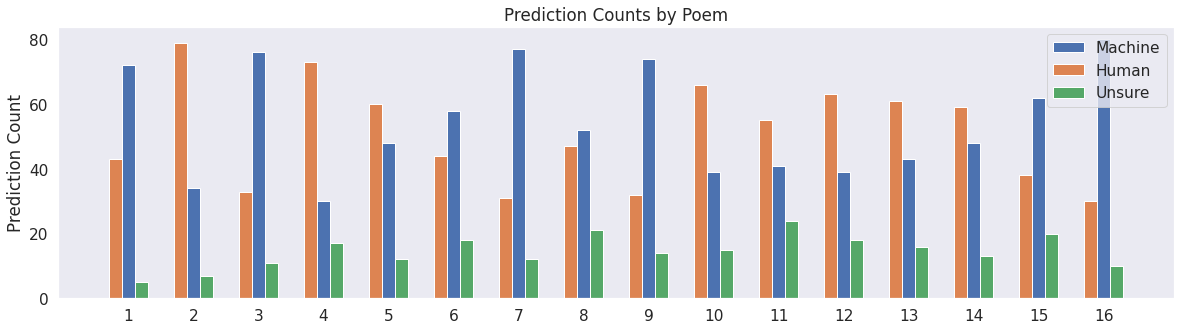

In [42]:
plotGroupedBar(poem_df, "all-poem-hist", "Prediction Counts by Poem")

In [15]:
poem_df[poem_df["Actual"] == "Machine"]

,Actual,Human,Machine,Unsure,Turing Test Result
1,Machine,79,34,7,PASS
4,Machine,60,48,12,PASS
6,Machine,31,77,12,FAIL
10,Machine,55,41,24,PASS
11,Machine,63,39,18,PASS
13,Machine,59,48,13,PASS
14,Machine,38,62,20,FAIL
15,Machine,30,80,10,FAIL


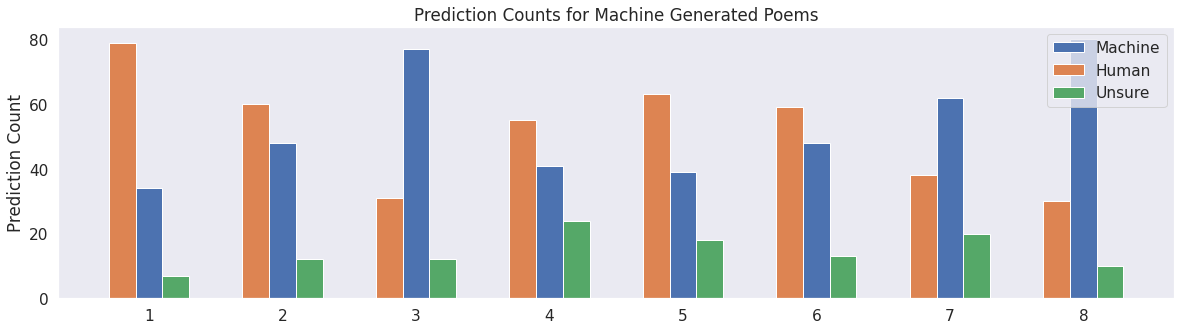

In [43]:
plotGroupedBar(poem_df[poem_df["Actual"] == "Machine"], "machine-poem-hist", "Prediction Counts for Machine Generated Poems")

In [17]:
poem_df[poem_df["Actual"] == "Human"]

,Actual,Human,Machine,Unsure,Turing Test Result
0,Human,43,72,5,PASS
2,Human,33,76,11,PASS
3,Human,73,30,17,FAIL
5,Human,44,58,18,PASS
7,Human,47,52,21,PASS
8,Human,32,74,14,PASS
9,Human,66,39,15,FAIL
12,Human,61,43,16,FAIL


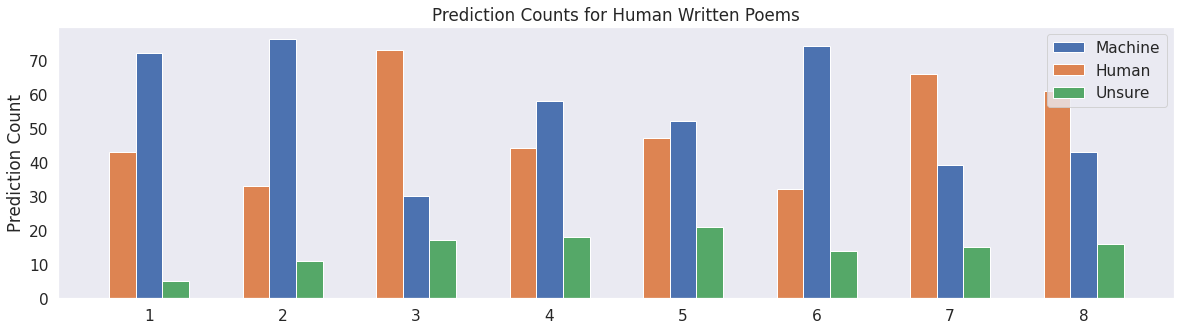

In [44]:
plotGroupedBar(poem_df[poem_df["Actual"] == "Human"], "human-poem-hist", "Prediction Counts for Human Written Poems")

# Pie Charts

In [19]:
human = list()
machine = list()
unsure = list()
labels = list()

## Machine generated, but predicted as Human

In [20]:
t = poem_df.loc[(poem_df["Turing Test Result"] == "PASS") & (poem_df["Actual"] == "Machine")]
t

,Actual,Human,Machine,Unsure,Turing Test Result
1,Machine,79,34,7,PASS
4,Machine,60,48,12,PASS
10,Machine,55,41,24,PASS
11,Machine,63,39,18,PASS
13,Machine,59,48,13,PASS


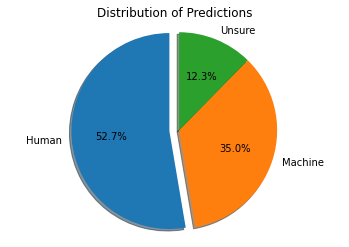

In [21]:
plotPie(t, [0.1, 0, 0], "actual-machine-predicted-human", "Distribution of Predictions")

In [22]:
human.append(np.mean(t["Human"].values))
machine.append(np.mean(t["Machine"].values))
unsure.append(np.mean(t["Unsure"].values))
labels.append("actual-machine-predicted-human")

## Machine generated, detected as Machine

In [23]:
t = poem_df.loc[(poem_df["Turing Test Result"] == "FAIL") & (poem_df["Actual"] == "Machine")]
t

,Actual,Human,Machine,Unsure,Turing Test Result
6,Machine,31,77,12,FAIL
14,Machine,38,62,20,FAIL
15,Machine,30,80,10,FAIL


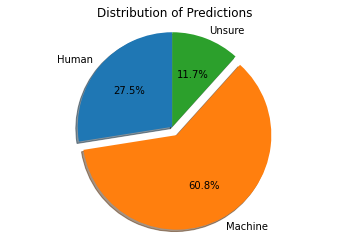

In [24]:
plotPie(t, [0, 0.1, 0], "actual-machine-predicted-machine", "Distribution of Predictions")

In [25]:
human.append(np.mean(t["Human"].values))
machine.append(np.mean(t["Machine"].values))
unsure.append(np.mean(t["Unsure"].values))
labels.append("actual-machine-predicted-machine")

## Human written, detected as Machine

In [26]:
t = poem_df.loc[(poem_df["Turing Test Result"] == "PASS") & (poem_df["Actual"] == "Human")]
t

,Actual,Human,Machine,Unsure,Turing Test Result
0,Human,43,72,5,PASS
2,Human,33,76,11,PASS
5,Human,44,58,18,PASS
7,Human,47,52,21,PASS
8,Human,32,74,14,PASS


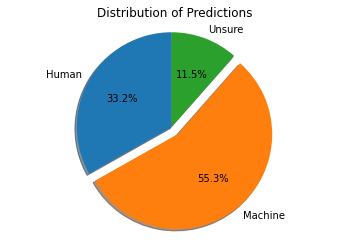

In [27]:
plotPie(t, [0, 0.1, 0], "actual-human-predicted-machine", "Distribution of Predictions")

In [28]:
human.append(np.mean(t["Human"].values))
machine.append(np.mean(t["Machine"].values))
unsure.append(np.mean(t["Unsure"].values))
labels.append("actual-human-predicted-machine")

## Human written, detected as Human

In [29]:
t = poem_df.loc[(poem_df["Turing Test Result"] == "FAIL") & (poem_df["Actual"] == "Human")]
t

,Actual,Human,Machine,Unsure,Turing Test Result
3,Human,73,30,17,FAIL
9,Human,66,39,15,FAIL
12,Human,61,43,16,FAIL


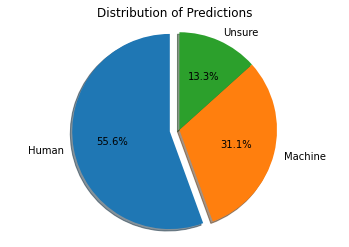

In [30]:
plotPie(t, [0.1, 0, 0], "actual-human-predicted-human", "Distribution of Predictions")

In [31]:
human.append(np.mean(t["Human"].values))
machine.append(np.mean(t["Machine"].values))
unsure.append(np.mean(t["Unsure"].values))
labels.append("actual-human-predicted-human")

In [32]:
mean_df = pd.DataFrame()
mean_df["Actual"] = [
                     "Machine generated predicted as human",
                     "Machine Generated predicted as machine",
                     "Human writted predicted as machine",
                     "Human written predicted as human"
]
mean_df["Machine"] = machine
mean_df["Human"] = human
mean_df["Unsure"] = unsure

In [33]:
mean_df.head()

,Actual,Machine,Human,Unsure
0,Machine generated predicted as human,42.000000,63.200000,14.8
1,Machine Generated predicted as machine,73.000000,33.000000,14.0
2,Human writted predicted as machine,66.400000,39.800000,13.8
3,Human written predicted as human,37.333333,66.666667,16.0


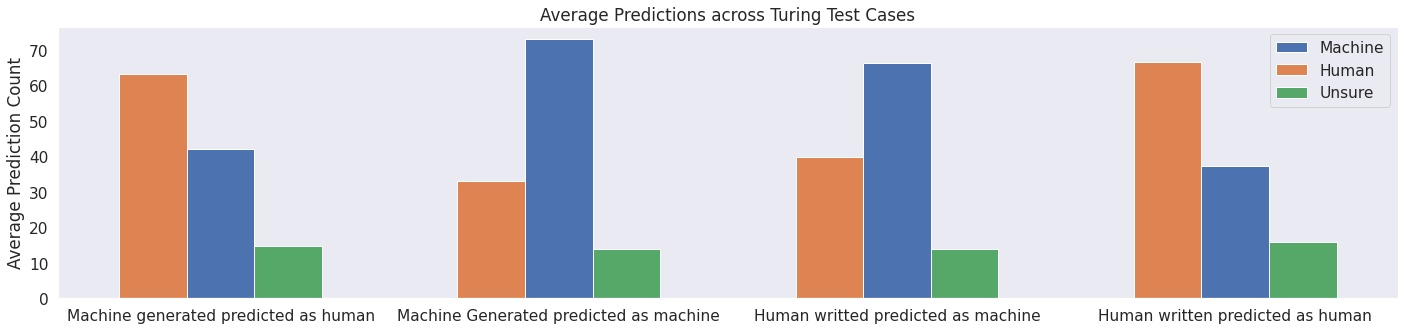

In [41]:
plotGroupedBarMeanDF(mean_df, "average-turing-result" ,"Average Predictions across Turing Test Cases")

# Overall Stats

In [35]:
all_df = pd.DataFrame()
poems = [f"{i+1}" for i in range(TOTAL_POEMS)]
actual_author = ACTUAL_ORDER

In [36]:
predicted = list()

for i in range(poem_df.shape[0]):
    if poem_df["Actual"][i] == "Human":
        if poem_df["Turing Test Result"][i] == "PASS":
            predicted.append("Machine")
        else:
            predicted.append("Human")
    else:
        if poem_df["Turing Test Result"][i] == "PASS":
            predicted.append("Human")
        else:
            predicted.append("Machine")

In [37]:
all_df["Actual"] = actual_author
all_df["Predicted"] = predicted

In [38]:
cm = confusion_matrix(actual_author, predicted, labels=["Machine", "Human"])

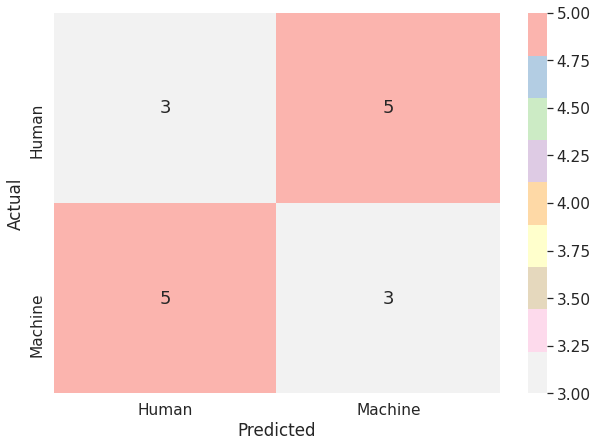

In [39]:
plotConfusionMatrix(cm)

In [45]:
downloadFiles()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>